In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
def evalGaussianDiscriminant(x, discrParams):
    Wa = discrParams[0]
    wb = discrParams[1]
    wc = discrParams[2]
    return (x.T @ Wa *x.T).sum(axis=1) + wb.T @ x + wc

In [3]:
def evalGuassianPDF(x, mean, cov):
    delta = x - mean
    return np.sqrt(np.linalg.det((2.0*math.pi)*cov))*np.exp( -0.5*(delta.T @ np.linalg.inv(cov) * delta.T).sum(axis=1) )

In [4]:
class GaussianDiscriminant:
    def __init__(self, classMean, classCovariance, classProbability):
        self.classMean = classMean
        self.classCovariance = classCovariance
        self.classProbability = classProbability
        self.inverseClassCovariance = np.linalg.inv(classCovariance)
        self.getDiscriminantParameters()
        
    def getDiscriminantParameters(self):
        self.A = (-0.5) * self.inverseClassCovariance
        self.b = self.inverseClassCovariance @ self.classMean
        self.c = (-0.5) * (self.classMean.T @ self.inverseClassCovariance @ self.classMean + np.log(np.linalg.det(self.classCovariance))) + np.log(self.classProbability)
    
    def evalGaussianDiscriminantForMany(self, X):
        return np.sum((X.T @ self.A) * X.T, axis=1) + self.b.T @ X + self.c

In [5]:
def solveProblem1(m1, m2, cov1, cov2):
    gd1 = GaussianDiscriminant(m1, cov1, 0.5)
    gd2 = GaussianDiscriminant(m2, cov2, 0.5)

    N   = 500
    x1  = np.linspace(-5,8,N)
    x2  = np.linspace(-5,8,N)
    (X1,X2) = np.meshgrid(x1, x2)
    U = np.concatenate((X1.reshape(1,N*N),X2.reshape(1,N*N)),0)
    print(np.shape(U))

    G1 = evalGuassianPDF(U, m1, cov1).reshape(N, N)
    G2 = evalGuassianPDF(U, m2, cov2).reshape(N, N)


    fig = plt.figure(figsize=(8,8))

    Z = (gd1.evalGaussianDiscriminantForMany(U) - gd2.evalGaussianDiscriminantForMany(U)).reshape(N,N)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    h0 = ax.contour(X1,X2,Z,cmap='viridis',levels=[0])

    h1 = ax.contour(X1,X2,G1,cmap='viridis')

    h2 = ax.contour(X1,X2,G2,cmap='plasma')
    ax.axis('equal')
    plt.show()

(2, 250000)


<Figure size 576x576 with 0 Axes>

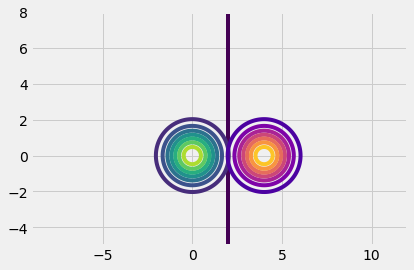

In [6]:
m1 = np.array([0,0]).reshape((2,1))
m2 = np.array([4,0]).reshape((2,1))
cov1 = np.array([[1,0],[0,1]])
cov2 = np.array([[1,0],[0,1]])

solveProblem1(m1, m2, cov1, cov2)

(2, 250000)


<Figure size 576x576 with 0 Axes>

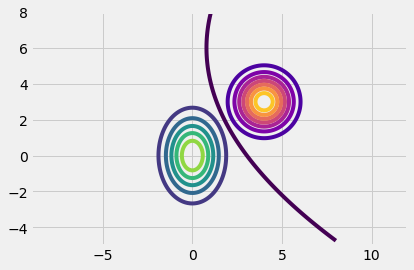

In [7]:
m1 = np.array([0,0]).reshape((2,1))
m2 = np.array([4,3]).reshape((2,1))
cov1 = np.array([[1,0],[0,2]])
cov2 = np.array([[1,0],[0,1]])

solveProblem1(m1, m2, cov1, cov2)

(2, 250000)


<Figure size 576x576 with 0 Axes>

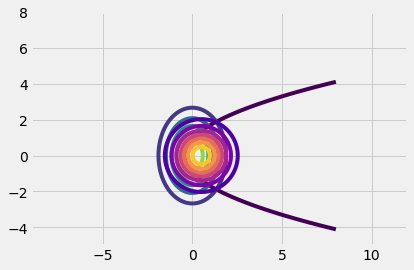

In [8]:
m1 = np.array([0,0]).reshape((2,1))
m2 = np.array([0.5,0]).reshape((2,1))
cov1 = np.array([[1,0],[0,2]])
cov2 = np.array([[1,0],[0,1]])

solveProblem1(m1, m2, cov1, cov2)

(2, 250000)


<Figure size 576x576 with 0 Axes>

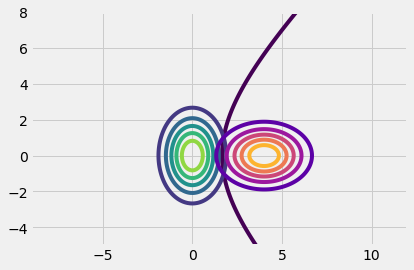

In [9]:
m1 = np.array([0,0]).reshape((2,1))
m2 = np.array([4,0]).reshape((2,1))
cov1 = np.array([[1,0],[0,2]])
cov2 = np.array([[2,0],[0,1]])

solveProblem1(m1, m2, cov1, cov2)